<a href="https://colab.research.google.com/github/arijalux/ArijalUX/blob/main/conver_of_nii_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

# Mount Google Drive to the specified path
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
!pip install numpy-stl scikit-image nibabel
!pip install trimesh
!pip install vtk
!pip install -q trimesh usd-core

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 736.6/736.6 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.3/112.3 MB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.4/27.4 MB 70.1 MB/s eta 0:00:00


In [ ]:
import matplotlib.pyplot as plt
import nibabel as nib
import numpy as np
from stl import mesh
from skimage import measure
import vtk
from vtk.util import numpy_support
from scipy.ndimage import gaussian_filter
import trimesh
import zipfile, os
from pxr import Usd, UsdGeom, Gf
from google.colab import files

In [ ]:
#Data Ground Truth
file_path = '/content/drive/MyDrive/mandibula/Mandible.nii'
#Data Output Model
file_path2 = '/content/drive/MyDrive/mandibula/nii_result.nii'

#Code Github

In [ ]:
# Extract the numpy array
nifti_file = nib.load(file_path)
np_array = nifti_file.get_fdata()

verts, faces, normals, values = measure.marching_cubes(np_array, 0)
obj_3d = mesh.Mesh(np.zeros(faces.shape[0], dtype=mesh.Mesh.dtype))

for i, f in enumerate(faces):
    obj_3d.vectors[i] = verts[f]

# Save the STL file with the name and the path
obj_3d.save('nii_result1.stl')

#Cek Header

In [ ]:
try:
    # Load the nifti file
    nifti_file = nib.load(file_path)
    nifti_file2 = nib.load(file_path2)

    # Get and display the header
    header = nifti_file.header
    print("NIfTI File Header ground truth:")
    print(header)

    print("-------------------------------")

    # Get and display the header
    header2 = nifti_file2.header
    print("NIfTI File Header output model:")
    print(header2)

except FileNotFoundError:
    print(f"Error: File not found at {file_path}")
except Exception as e:
    print(f"An error occurred: {e}")

NIfTI File Header ground truth:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : np.bytes_(b'')
db_name         : np.bytes_(b'')
extents         : 0
session_error   : 0
regular         : np.bytes_(b'r')
dim_info        : 0
dim             : [  3 512 512 256   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : uint8
bitpix          : 8
slice_start     : 0
pixdim          : [1.        0.98      0.98      1.7695312 0.        0.        0.
 0.       ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : np.bytes_(b'')
aux_file        : np.bytes_(b'')
qform_code      : scanner
sform_code      : scanner
quatern_b       : 0.0
quatern_c       : 0.0
quatern

##cek jarak pixdim

In [ ]:
try:
    # Load the nifti file
    nifti_file = nib.load(file_path)

    # Get the pixdim information from the header
    pixdim = nifti_file.header['pixdim']

    print(f"Nilai pixdim dari header:")
    print(pixdim)
    print(f"\nEstimasi jarak antar slice (pixdim[3]): {pixdim[3]}")

except FileNotFoundError:
    print(f"Error: File not found at {file_path}")
except Exception as e:
    print(f"An error occurred: {e}")

Nilai pixdim dari header:
[1.        0.98      0.98      1.7695312 0.        0.        0.
 0.       ]

Estimasi jarak antar slice (pixdim[3]): 1.76953125


#test code

##code 1.1


In [ ]:
# Load nifti file
nifti_file = nib.load(file_path)
np_array = nifti_file.get_fdata()

# Get voxel spacing
spacing = nifti_file.header.get_zooms()[:3]
print(f"Voxel spacing: {spacing}")
print(f"Array shape: {np_array.shape}")
print(f"Value range: [{np_array.min()}, {np_array.max()}]")

# threshold
threshold = 0.5
print(f"Using threshold: {threshold}")

# Generate mesh
verts, faces, normals, values = measure.marching_cubes(
    np_array,
    level=threshold,
    spacing=spacing,
    step_size=1
)

# Buat STL mesh
obj_3d = mesh.Mesh(np.zeros(faces.shape[0], dtype=mesh.Mesh.dtype))

for i, f in enumerate(faces):
    obj_3d.vectors[i] = verts[f]

# Save STL
# obj_3d.save('nii_result5.stl')

print(f"STL saved with {len(faces)} faces")
print(f"Vertices range: [{verts.min(axis=0)}, {verts.max(axis=0)}]")

Voxel spacing: (np.float32(0.98), np.float32(0.98), np.float32(1.7695312))
Array shape: (512, 512, 256)
Value range: [0.0, 1.0]
Using threshold: 0.5
STL saved with 33848 faces
Vertices range: [[186.69    138.67    206.15039], [312.13    236.67    296.39648]]


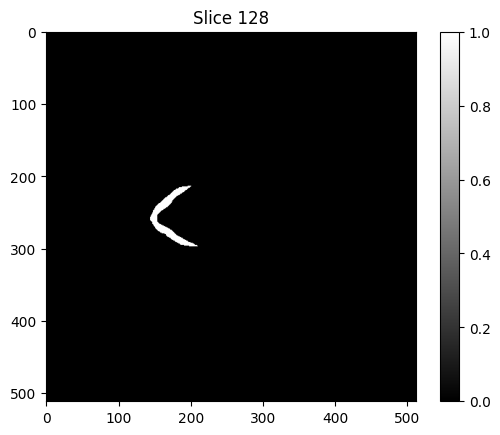

In [ ]:
slice_idx = np_array.shape[2] // 2
plt.imshow(np_array[:, :, slice_idx], cmap='gray')
plt.title(f'Slice {slice_idx}')
plt.colorbar()
plt.show()

##code 2

In [ ]:
nifti_file = nib.load(file_path)
np_array = nifti_file.get_fdata()
spacing = nifti_file.header.get_zooms()[:3]

print(f"Original shape: {np_array.shape}")
print(f"Spacing: {spacing}")
print(f"Value range: [{np_array.min()}, {np_array.max()}]")


#  mengurangi noise
np_array_smooth = gaussian_filter(np_array, sigma=1.0)

# Generate mesh
verts, faces, normals, values = measure.marching_cubes(
    np_array_smooth,
    level=0.5,
    spacing=spacing,
    step_size=1,
    allow_degenerate=False
)

print(f"Generated {len(faces)} faces")

# Buat STL
obj_3d = mesh.Mesh(np.zeros(faces.shape[0], dtype=mesh.Mesh.dtype))
for i, f in enumerate(faces):
    obj_3d.vectors[i] = verts[f]

obj_3d.save('nii_result6.stl')
print("STL saved!")

Original shape: (512, 512, 256)
Spacing: (np.float32(0.98), np.float32(0.98), np.float32(1.7695312))
Value range: [0.0, 1.0]
Generated 31492 faces
STL saved!


##code 3

In [ ]:
nifti_file = nib.load(file_path2)
np_array = nifti_file.get_fdata()
spacing = nifti_file.header.get_zooms()[:3]

print(f"Original shape: {np_array.shape}")
print(f"Spacing: {spacing}")
print(f"Value range: [{np_array.min()}, {np_array.max()}]")

# Smooth data
print("Smoothing data...")
np_array_smooth = gaussian_filter(np_array, sigma=1.0)

# Marching cubes
print("Generating mesh...")
verts, faces, normals, values = measure.marching_cubes(
    np_array_smooth,
    level=0.5,
    spacing=spacing,
    step_size=1,
    allow_degenerate=False
)

print(f"Generated {len(faces)} faces, {len(verts)} vertices")

#  trimesh object
tri_mesh = trimesh.Trimesh(vertices=verts, faces=faces)

print(f"Original mesh: {len(tri_mesh.faces)} faces")

# SMOOTHING Laplacian
print("Smoothing mesh...")
trimesh.smoothing.filter_laplacian(tri_mesh, iterations=5, lamb=0.5)

if len(tri_mesh.faces) > 100000:
    print("Simplifying mesh...")
    tri_mesh = tri_mesh.simplify_quadric_decimation(50000)  # target 50k faces

print(f"Final mesh: {len(tri_mesh.faces)} faces")

# Remove degenerate faces (faces yang rusak)
tri_mesh.remove_degenerate_faces()
tri_mesh.remove_duplicate_faces()
tri_mesh.remove_unreferenced_vertices()

# Fix normals
tri_mesh.fix_normals()

# Export STL
output_path = 'nii_result7.stl'
tri_mesh.export(output_path)

print(f"STL saved to: {output_path}")
print(f"File size: {tri_mesh.area:.2f} mm²")
print(f"Bounding box: {tri_mesh.bounds}")

# Optional: Preview
tri_mesh.show()

Original shape: (512, 512, 256)
Spacing: (np.float32(0.98), np.float32(0.98), np.float32(1.7695312))
Value range: [0.0, 1.0]
Smoothing data...
Generating mesh...
Generated 31988 faces, 15998 vertices
Original mesh: 31988 faces
Smoothing mesh...
Final mesh: 31988 faces
STL saved to: nii_result7.stl
File size: 15828.85 mm²
Bounding box: [[191.01788961 141.96258268 208.1682998 ]
 [315.56138656 239.36418993 298.87240259]]


/tmp/ipython-input-2549763021.py:43: DeprecationWarning: `remove_degenerate_faces` is deprecated and will be removed in March 2024 replace with `self.update_faces(self.nondegenerate_faces(height=height))`
  tri_mesh.remove_degenerate_faces()
/tmp/ipython-input-2549763021.py:44: DeprecationWarning: `remove_duplicate_faces` is deprecated and will be removed in March 2024: replace with `mesh.update_faces(mesh.unique_faces())`
  tri_mesh.remove_duplicate_faces()


##code 4

In [ ]:
nifti_file = nib.load(file_path)
np_array = nifti_file.get_fdata()
spacing = nifti_file.header.get_zooms()[:3]

print(f"Original shape: {np_array.shape}")
print(f"Spacing: {spacing}")
print(f"Value range: [{np_array.min()}, {np_array.max()}]")

# Convert numpy array ke VTK format
np_array_flat = np_array.flatten(order='F')
vtk_data = numpy_support.numpy_to_vtk(
    num_array=np_array_flat,
    deep=True,
    array_type=vtk.VTK_FLOAT
)

# VTK Image Data
img = vtk.vtkImageData()
img.SetDimensions(np_array.shape)
img.SetSpacing(spacing)
img.SetOrigin(0, 0, 0)
img.GetPointData().SetScalars(vtk_data)

print("VTK Image created")

# Gaussian Smoothing
print("Applying Gaussian smoothing...")
gaussian = vtk.vtkImageGaussianSmooth()
gaussian.SetInputData(img)
gaussian.SetStandardDeviation(1.0)
gaussian.SetRadiusFactor(2)
gaussian.Update()

# Marching Cubes - Generate surface
print("Running Marching Cubes...")
mc = vtk.vtkMarchingCubes()
mc.SetInputConnection(gaussian.GetOutputPort())
mc.SetValue(0, 0.5)  # Threshold value
mc.ComputeNormalsOn()
mc.ComputeGradientsOn()
mc.Update()

print(f"Initial mesh: {mc.GetOutput().GetNumberOfPoints()} vertices, {mc.GetOutput().GetNumberOfCells()} faces")

# Smoothing Filter
print("Smoothing mesh...")
smoother = vtk.vtkSmoothPolyDataFilter()
smoother.SetInputConnection(mc.GetOutputPort())
smoother.SetNumberOfIterations(50)
smoother.SetRelaxationFactor(0.1)
smoother.FeatureEdgeSmoothingOff()
smoother.BoundarySmoothingOn()
smoother.Update()

# Decimation - Reduce jumlah faces
print("Decimating mesh...")
decimate = vtk.vtkDecimatePro()
decimate.SetInputConnection(smoother.GetOutputPort())
decimate.SetTargetReduction(0.3)
decimate.PreserveTopologyOn()
decimate.Update()

print(f"Decimated mesh: {decimate.GetOutput().GetNumberOfPoints()} vertices, {decimate.GetOutput().GetNumberOfCells()} faces")

# Clean mesh
print("Cleaning mesh...")
cleaner = vtk.vtkCleanPolyData()
cleaner.SetInputConnection(decimate.GetOutputPort())
cleaner.Update()

# Fix normals
print("Fixing normals...")
normals = vtk.vtkPolyDataNormals()
normals.SetInputConnection(cleaner.GetOutputPort())
normals.ConsistencyOn()
normals.SplittingOff()
normals.Update()

# Save to STL
print("Saving STL...")
writer = vtk.vtkSTLWriter()
writer.SetFileName('nii_result2.stl')
writer.SetInputConnection(normals.GetOutputPort())
writer.SetFileTypeToBinary()
writer.Write()

print("STL file saved successfully!")
print(f"Final mesh stats:")
final_mesh = normals.GetOutput()
print(f"  Vertices: {final_mesh.GetNumberOfPoints()}")
print(f"  Faces: {final_mesh.GetNumberOfCells()}")

Original shape: (512, 512, 256)
Spacing: (np.float32(0.98), np.float32(0.98), np.float32(1.7695312))
Value range: [0.0, 1.0]
VTK Image created
Applying Gaussian smoothing...
Running Marching Cubes...
Initial mesh: 15786 vertices, 31568 faces
Smoothing mesh...
Decimating mesh...
Decimated mesh: 11050 vertices, 22096 faces
Cleaning mesh...
Fixing normals...
Saving STL...
STL file saved successfully!
Final mesh stats:
  Vertices: 11050
  Faces: 22096


##code stl to USDZ

In [ ]:
# Load STL from path
stl = '/content/nii_result7.stl'
mesh = trimesh.load(stl)
print(f"Loaded: {len(mesh.vertices)} vertices, {len(mesh.faces)} faces")

# Create USD
usdc = stl.replace('.stl', '.usdc').replace('.STL', '.usdc')
stage = Usd.Stage.CreateNew(usdc)
UsdGeom.SetStageUpAxis(stage, UsdGeom.Tokens.y)

usd_mesh = UsdGeom.Mesh.Define(stage, '/World/mesh')
usd_mesh.CreatePointsAttr([Gf.Vec3f(*v) for v in mesh.vertices])
usd_mesh.CreateFaceVertexIndicesAttr(mesh.faces.flatten().tolist())
usd_mesh.CreateFaceVertexCountsAttr([3] * len(mesh.faces))

if hasattr(mesh, 'vertex_normals'):
    usd_mesh.CreateNormalsAttr([Gf.Vec3f(*n) for n in mesh.vertex_normals])

stage.Save()

# Create USDZ
usdz = usdc.replace('.usdc', '.usdz')
with zipfile.ZipFile(usdz, 'w', zipfile.ZIP_DEFLATED) as z:
    z.write(usdc, os.path.basename(usdc))

print(f"usdz Done: {usdz}")
files.download(usdz)

Loaded: 15998 vertices, 31988 faces
✅ Done: /content/nii_result7.usdz


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>